# 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

## 1. 데이터 분류하기


In [1]:
# 훈련, 검증, 테스트 폴더로 이미지 복사하기
import os
import shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


## 2. 네트워크 구성하기


In [3]:
# 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# 모델의 훈련 설정하기
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## 3. 데이터 전처리


In [6]:
# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [8]:
# 배치 제너레이터를 사용하여 모델 훈련하기
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30


/var/folders/wq/fkgy_5nd6mj8k970rhmj291c0000gn/T/ipykernel_11323/701889575.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,
2023-06-06 08:34:46.773263: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100/100 [==============================] - 5s 44ms/step - loss: 0.6895 - acc: 0.5330 - val_loss: 0.6804 - val_acc: 0.5650
Epoch 2/30
100/100 [==============================] - 4s 42ms/step - loss: 0.6447 - acc: 0.6230 - val_loss: 0.6323 - val_acc: 0.6150
Epoch 3/30
100/100 [==============================] - 4s 39ms/step - loss: 0.5960 - acc: 0.6775 - val_loss: 0.6108 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5475 - acc: 0.7160 - val_loss: 0.6011 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 4s 39ms/step - loss: 0.5238 - acc: 0.7355 - val_loss: 0.6162 - val_acc: 0.6570
Epoch 6/30
100/100 [==============================] - 4s 39ms/step - loss: 0.5006 - acc: 0.7540 - val_loss: 0.5885 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 4s 38ms/step - loss: 0.4733 - acc: 0.7695 - val_loss: 0.6303 - val_acc: 0.6790
Epoch 8/30
100/100 [==============================] - 4s 38ms/step - loss: 0.449

In [9]:
# 모델 저장하기
model.save('cats_and_dogs_small_1.h5')

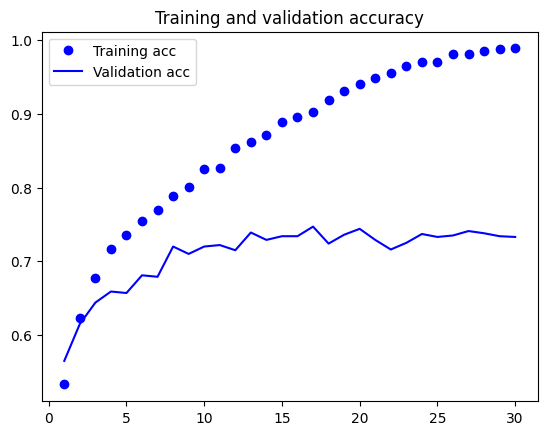

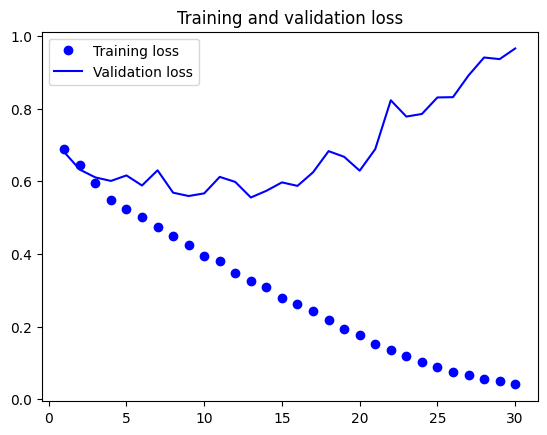

In [10]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 4. 데이터 증식 사용하기


In [11]:
# ImageDataGenerator를 사용하여 데이터 증식 설정하기
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

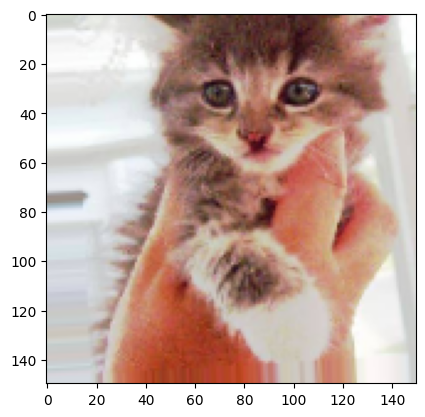

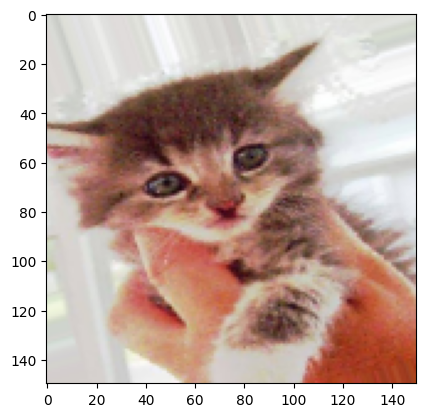

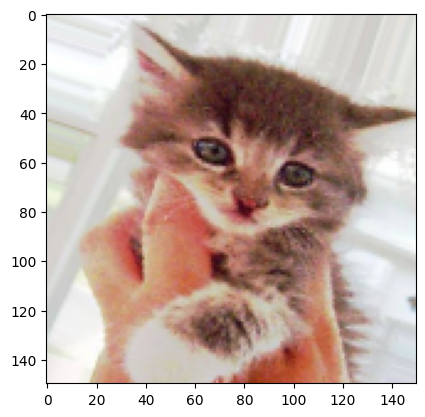

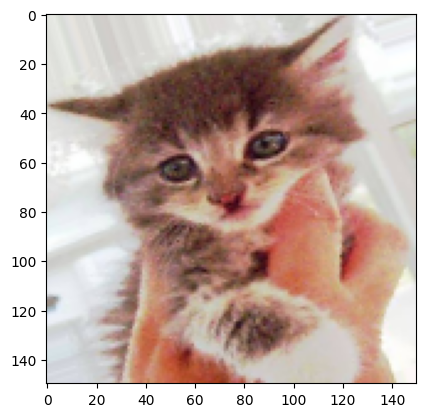

In [12]:
# 랜덤하게 증식된 훈련 이미지 그리기
import keras.utils as image

fnames = sorted([os.path.join(train_cats_dir, fname)
                for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [13]:
# 드롭아웃을 포함한 새로운 컨브넷 정의하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [14]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/var/folders/wq/fkgy_5nd6mj8k970rhmj291c0000gn/T/ipykernel_11323/2008938965.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 9s 85ms/step - loss: 0.6943 - acc: 0.5175 - val_loss: 0.6878 - val_acc: 0.5800
Epoch 2/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6846 - acc: 0.5570 - val_loss: 0.6659 - val_acc: 0.6150
Epoch 3/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6769 - acc: 0.5805 - val_loss: 0.6582 - val_acc: 0.5880
Epoch 4/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6611 - acc: 0.5885 - val_loss: 0.6358 - val_acc: 0.6300
Epoch 5/100
100/100 [==============================] - 9s 85ms/step - loss: 0.6506 - acc: 0.6035 - val_loss: 0.6479 - val_acc: 0.6000
Epoch 6/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6404 - acc: 0.6175 - val_loss: 0.6029 - val_acc: 0.6710
Epoch 7/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6282 - acc: 0.6370 - val_loss: 0.5935 - val_acc: 0.6630
Epoch 8/100
100/100 [==============================] - 8s 84ms/step - loss

In [15]:
# 모델 저장하기
model.save('cats_and_dogs_small_2.h5')

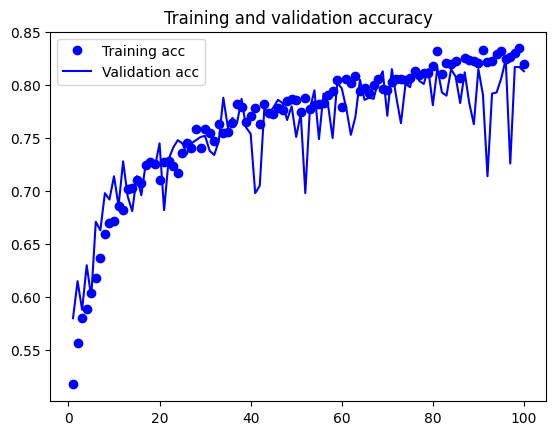

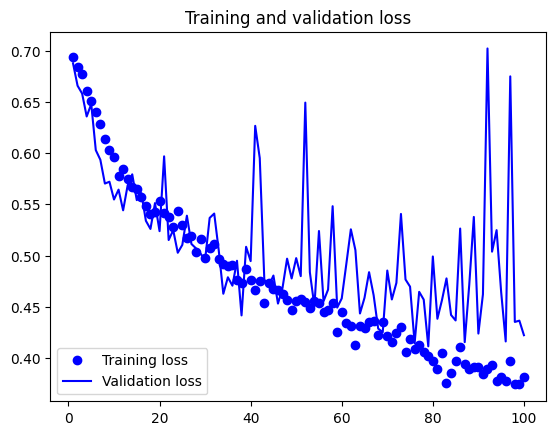

In [16]:
# 훈련의 정확도와 손실 그래프 그리기
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5. 사전 훈련된 컨브넷 사용하기


In [17]:
# VGG16 합성곱 기반 층 만들기
from keras.applications import VGG16

# weights: 모델을 초기화할 가중치 체크포인트(checkpoint) 지정
# include_top: 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지 지정
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### 5.1. 데이터 증식을 사용하지 않는 빠른 특성 추출


In [19]:
# 사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i+1) * batch_size] = features_batch
        labels[i * batch_size: (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 14ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 14ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 14ms/step


In [20]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [21]:
# 완전 연결 분류기를 정의하고 훈련하기
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 10ms/step - loss: 0.5676 - acc: 0.7070 - val_loss: 0.4350 - val_acc: 0.8420
Epoch 2/30
100/100 [==============================] - 1s 9ms/step - loss: 0.4063 - acc: 0.8305 - val_loss: 0.3586 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3342 - acc: 0.8610 - val_loss: 0.3231 - val_acc: 0.8850
Epoch 4/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2925 - acc: 0.8850 - val_loss: 0.3105 - val_acc: 0.8720
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2646 - acc: 0.9005 - val_loss: 0.2795 - val_acc: 0.8980
Epoch 6/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2391 - acc: 0.9075 - val_loss: 0.2695 - val_acc: 0.8950
Epoch 7/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2249 - acc: 0.9125 - val_loss: 0.2684 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 1s 9ms/step - loss: 0

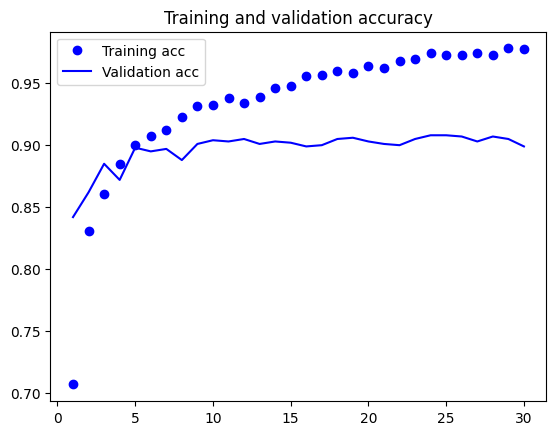

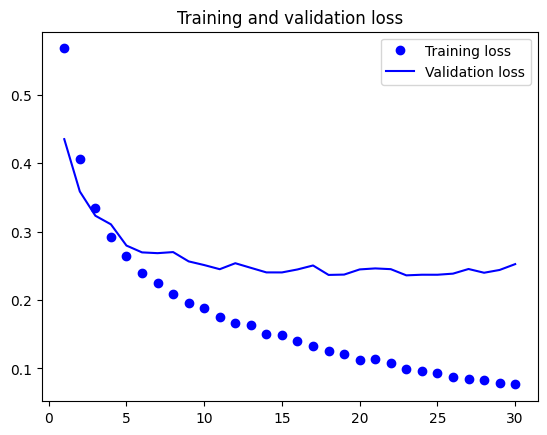

In [22]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 5.2. 데이터 증식을 사용한 특성 추출


In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [26]:
# 동결된 합성곱 기반 층과 함께 모델을 엔드-투-엔드로 훈련하기
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


/var/folders/wq/fkgy_5nd6mj8k970rhmj291c0000gn/T/ipykernel_11323/2785171783.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 - 12s - loss: 0.5461 - acc: 0.7305 - val_loss: 0.4099 - val_acc: 0.8410 - 12s/epoch - 116ms/step
Epoch 2/30
100/100 - 11s - loss: 0.4029 - acc: 0.8400 - val_loss: 0.3469 - val_acc: 0.8620 - 11s/epoch - 108ms/step
Epoch 3/30
100/100 - 11s - loss: 0.3419 - acc: 0.8645 - val_loss: 0.3092 - val_acc: 0.8800 - 11s/epoch - 108ms/step
Epoch 4/30
100/100 - 11s - loss: 0.3247 - acc: 0.8690 - val_loss: 0.2876 - val_acc: 0.8830 - 11s/epoch - 109ms/step
Epoch 5/30
100/100 - 11s - loss: 0.3007 - acc: 0.8795 - val_loss: 0.2722 - val_acc: 0.8920 - 11s/epoch - 108ms/step
Epoch 6/30
100/100 - 11s - loss: 0.2866 - acc: 0.8785 - val_loss: 0.2631 - val_acc: 0.8990 - 11s/epoch - 108ms/step
Epoch 7/30
100/100 - 11s - loss: 0.2759 - acc: 0.8825 - val_loss: 0.2629 - val_acc: 0.8920 - 11s/epoch - 108ms/step
Epoch 8/30
100/100 - 11s - loss: 0.2622 - acc: 0.8935 - val_loss: 0.2562 - val_acc: 0.8970 - 11s/epoch - 108ms/step
Epoch 9/30
100/100 - 11s - loss: 0.2531 - acc: 0.8945 - val_loss: 0.2465 - val_acc:

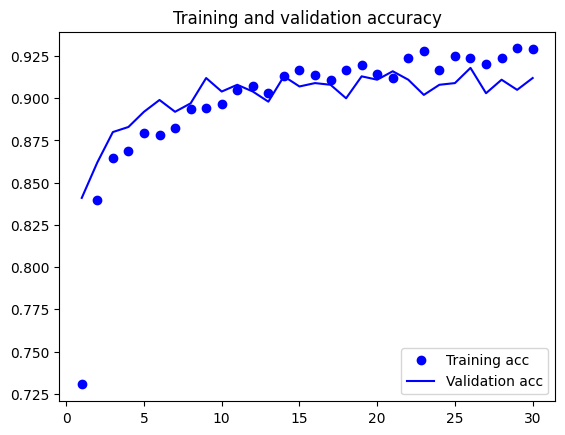

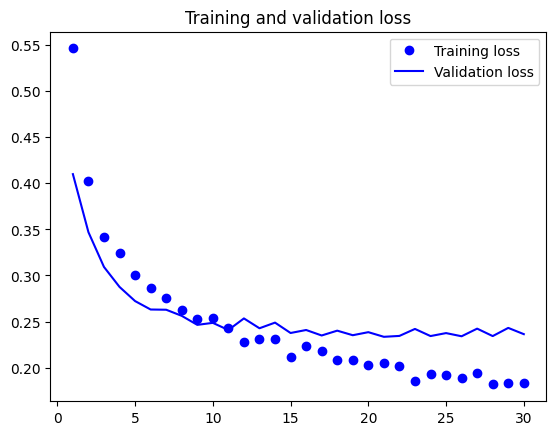

In [27]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6. 미세 조정


In [28]:
# 특정 층까지 모든 층 동결하기
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [29]:
# 모델 미세 조정하기
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100


/var/folders/wq/fkgy_5nd6mj8k970rhmj291c0000gn/T/ipykernel_11323/3057922467.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 14s 128ms/step - loss: 0.2014 - acc: 0.9215 - val_loss: 0.2301 - val_acc: 0.9150
Epoch 2/100
100/100 [==============================] - 13s 125ms/step - loss: 0.1637 - acc: 0.9315 - val_loss: 0.2218 - val_acc: 0.9150
Epoch 3/100
100/100 [==============================] - 13s 125ms/step - loss: 0.1301 - acc: 0.9470 - val_loss: 0.2185 - val_acc: 0.9230
Epoch 4/100
100/100 [==============================] - 13s 125ms/step - loss: 0.1294 - acc: 0.9490 - val_loss: 0.2165 - val_acc: 0.9180
Epoch 5/100
100/100 [==============================] - 13s 125ms/step - loss: 0.1064 - acc: 0.9620 - val_loss: 0.2024 - val_acc: 0.9300
Epoch 6/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0922 - acc: 0.9680 - val_loss: 0.2393 - val_acc: 0.9220
Epoch 7/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0830 - acc: 0.9695 - val_loss: 0.2092 - val_acc: 0.9260
Epoch 8/100
100/100 [==============================] - 13s 1

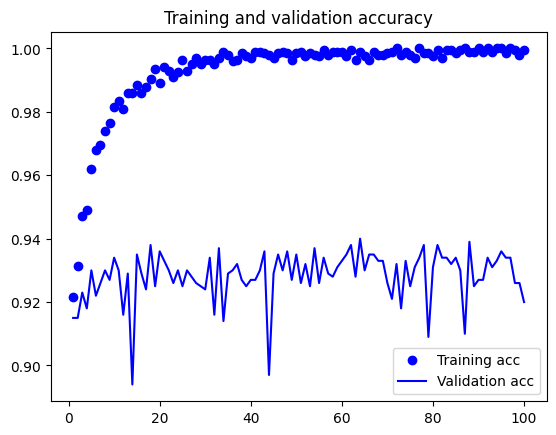

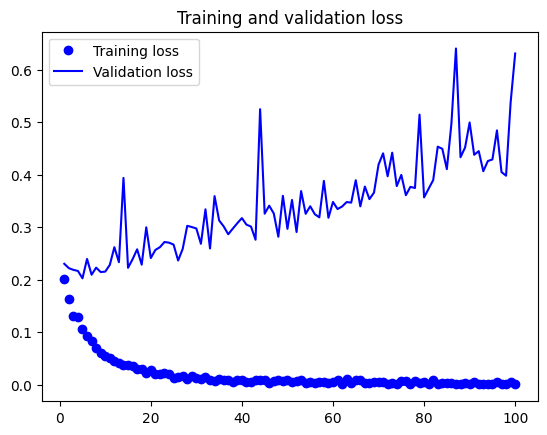

In [30]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

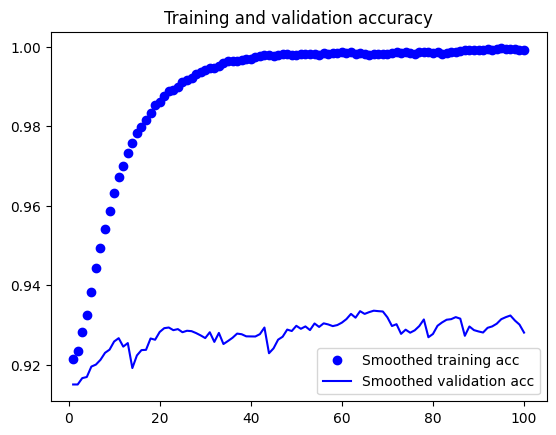

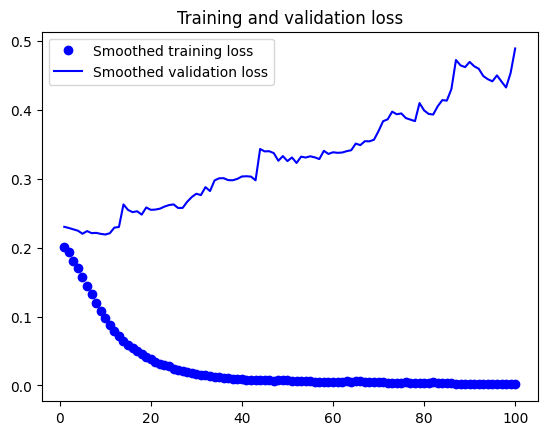

In [31]:
# 부드러운 그래프 그리기
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
# 테스트 데이터에서 모델 평가
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/var/folders/wq/fkgy_5nd6mj8k970rhmj291c0000gn/T/ipykernel_11323/1564913606.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9240000247955322
